# The ECCO Lat-Lon-Cap Grid

In this notebook, we will examine the structure of the ECCO Lat-Lon-Cap grid.

Begin by downloading the grid file from the following link into this week's lesson folder:

https://podaac.jpl.nasa.gov/dataset/ECCO_L4_GEOMETRY_LLC0090GRID_V4R4

Next, import the modules required for this notebook:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4

With these modules written in, write some code to read in the `Depth` variable from the grid file.

In [42]:
ds = nc4.Dataset('GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
Depth = ds.variables['Depth'][:,:,:]
XC = ds.variables['XC'][:,:,:]
YC = ds.variables['YC'][:,:,:]
rA = ds.variables['rA'][:,:,:]

ds.close()

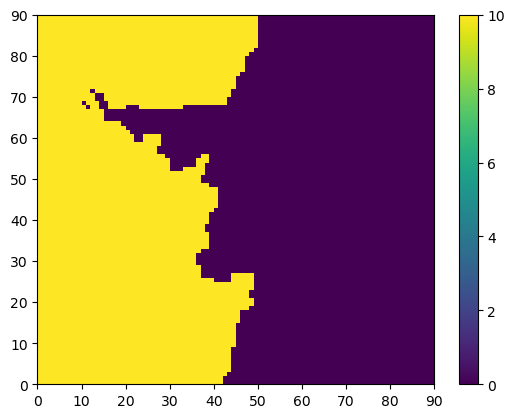

In [28]:
tile_number = 12
plt.pcolormesh(Depth[tile_number, :, :], vmax=10)
plt.colorbar()
plt.show()

# 0 antartica
# 1 southern africa (south atlantic)
# 2 Europe, MENA (north atlantic, medi...
# 3 antartica 
# 4 western oceania (australia, malaysia) eastern indian ocean 
# 5 Asia
# 6 North Pole
# 7 bering strait 
# 8 eastern australia / NZ 
# 9 Antartica 
# 10 North America 
# 11 south amerca
# 12 antartica 

# rectangular spherical shape

The depth file should be a 3-dimensional grid. The second and third dimensions correspond to the rows and columns of each "tile" in the ECCO LLC grid (the first dimension of the grid). Using the following coding cell as a testing ground, fill in the following table. The first tile has been completed for you.

| Tile Number | Location |
|-------------|----------|
| 0           | South Atlantic Ocean / Antarctica |
| 1           |          |
| 2           |          |
| 3           |          |
| 4           |          |
| 5           |          |
| 6           |          |
| 7           |          |
| 8           |          |
| 9           |          |
| 10          |          |
| 11          |          |
| 12          |          |

Up next, use the code on the course notes [HERE](https://profmikewood.github.io/ocean_modeling_book/ecco/ecco_llc_grid.html#ecco-tiles) to generate a plot of each tile in an organized manner. Make your code flexible so you can specify different variables from the dataset. Then, examine the following variables: XC, YC, rA, dxC, dyC. What do these variables correspond to?

[[3.6225645e+08 3.6330096e+08 3.6425389e+08 ... 6.0276308e+07
  5.3553676e+07 4.7093872e+07]
 [3.6961037e+08 3.7067478e+08 3.7164586e+08 ... 6.1906760e+07
  5.5057284e+07 4.8475600e+07]
 [3.7716797e+08 3.7825142e+08 3.7923990e+08 ... 6.4021868e+07
  5.7052416e+07 5.0355492e+07]
 ...
 [3.3636692e+09 3.3636692e+09 3.3636692e+09 ... 3.3636692e+09
  3.3636692e+09 3.3636692e+09]
 [3.4631982e+09 3.4631982e+09 3.4631982e+09 ... 3.4631982e+09
  3.4631982e+09 3.4631982e+09]
 [3.5442668e+09 3.5442668e+09 3.5442668e+09 ... 3.5442668e+09
  3.5442668e+09 3.5442668e+09]]


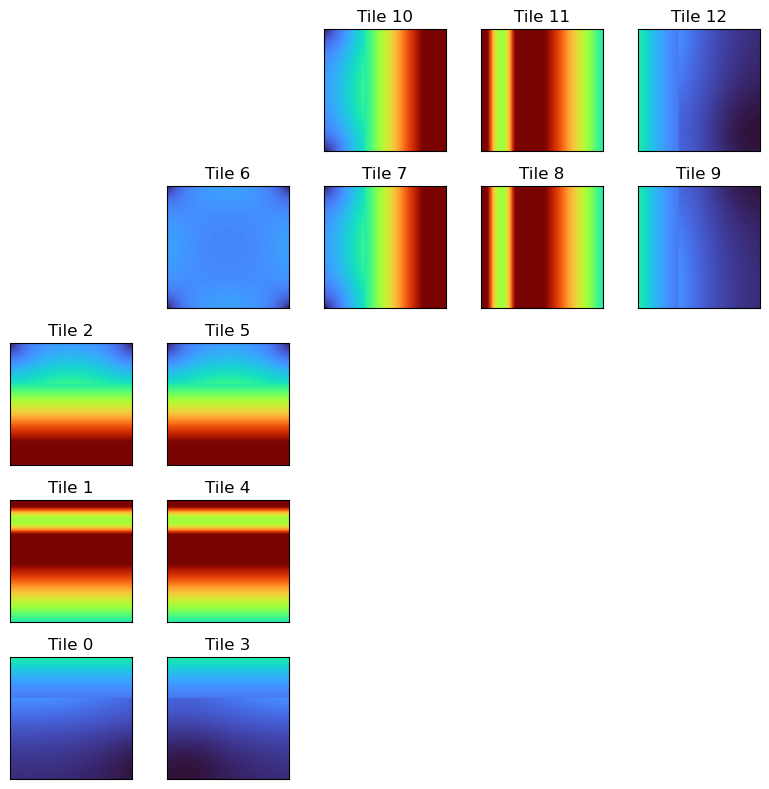

In [55]:
print(rA[0, :, :])

# quick dictionary to place tiles at different lcoations
tile_to_subplot = {1: [5, 1], 2: [4, 1], 3: [3, 1],
                       4: [5, 2], 5: [4, 2], 6: [3, 2],
                       7: [2, 2],
                       8: [2, 3], 9: [2, 4], 10: [2, 5],
                       11: [1, 3], 12: [1, 4], 13: [1, 5]}

fig = plt.figure(figsize=(8,8))

vmin=180000
vmax=1e10

for tile_number in range(13):
    row = tile_to_subplot[tile_number+1][0]
    col = tile_to_subplot[tile_number+1][1]
    counter = (row - 1) * 5 + col

    plt.subplot(5, 5, counter)

    plt.imshow(rA[tile_number, :, :], origin='lower', cmap='turbo',vmin=vmin,vmax=vmax)
    plt.title('Tile '+str(tile_number))

    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

plt.tight_layout()

# smaller features to deal with in the poles looking at Eddies compared to equator


Now that we're familiar with the grid, let's take a look at monthly mean ocean velocity. Download one of the available ocean velocity fields, available here:

https://podaac.jpl.nasa.gov/dataset/ECCO_L4_OCEAN_VEL_LLC0090GRID_MONTHLY_V4R4

Then, make a plot like the one above.

In [56]:
ds = nc4.Dataset('OCEAN_VELOCITY_mon_mean_2015-08_ECCO_V4r4_native_llc0090.nc')
UVEL = ds.variables['UVEL'][:,:,:,:,:]
ds.close()

Question for consideration: What direction are the ocean currents along the east coast of the United States?

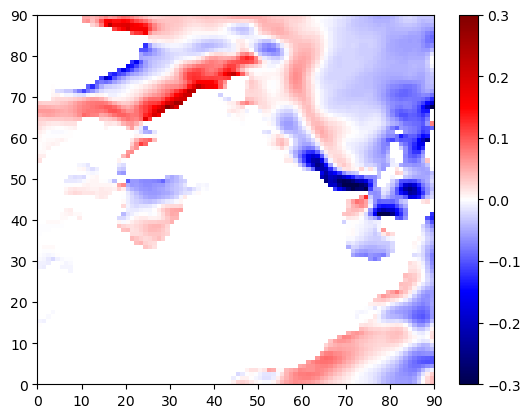

In [60]:
plt.pcolormesh(UVEL[0,0,10,:,:], cmap='seismic', vmin=-.3, vmax=.3)
plt.colorbar()
plt.show()

In [ ]:
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_HEAT_FLUX_LLC0090GRID_MONTHLY_V4R4